# <b>Problem Definition and Data Exploration

##<b>Problem Definition</b>
Out of the many microorganisms that could cause serious illness or even death, Plasmodium remains one of the most prevalent. Plasmodium is a parasite that can be transmitted through the bite of infected female Anopheles mosquitoes causing the human to have Malaria. The parasite grows and multiplies first in the human’s liver, then in the blood's red cells—patients with Malaria present with symptoms such as fever, nausea, vomiting, and headaches. In severe cases, the loss of red blood cells can lead to kidney failure, coma, and death. In 2020, reports showed 241 million cases of Malaria with 627,000 deaths. 95% of the deaths occurred in African regions.<br>

Since Plasmodium is known to attack human blood cells, clinicians use a Blood Smear test to diagnose patients with suspected Malaria. Under the microscope, the physician can locate the parasites and count their number. A Blood Smear test is the first diagnostic step. However, there are other useful tests, such as Polymerase Chain Reaction (PCR), Complete Blood Count (CBC), and Blood Glucose test.<br>

This project intends to automate Malaria detection using images from the blood smear test. Therefore, we will build a machine-learning model. Then train and test the model using the microscopic images of the red blood cells. The outcome will be a classification solution of either parasitized (have Malaria) or uninfected (don’t have Malaria). To build such a model, first, we must tackle the critical question: What machine learning method would produce an accurate and cost-effective model? To answer the question, we will explore the data (images). Then we will formulate the techniques to design the solution.<br>


## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


##**Note: all observations and insights of the data exploration are provided in the PDF file**


###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected"
# folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending
            # that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected"
# folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that
            # array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print('Shape: ', train_images.shape)
print('Shape: ', test_images.shape)

Shape:  (24958, 64, 64, 3)
Shape:  (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
print('Shape: ', train_labels.shape)
print('Shape: ', test_labels.shape) 

Shape:  (24958,)
Shape:  (2600,)


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
print('Min: %.3f, Max: %.3f' % (train_images.min(), train_images.max()))
print('Min: %.3f, Max: %.3f' % (test_images.min(), test_images.max()))

Min: 0.000, Max: 255.000
Min: 0.000, Max: 255.000


###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# Try to use value_counts to count the values
par_test = os.listdir(test_dir+'/parasitized/')
par_train = os.listdir(train_dir+'/parasitized/')
print("Number of the infected cells in the train and test dataset:",len(par_test)+len(par_train))

un_test = os.listdir(test_dir+'/uninfected/')
un_train = os.listdir(train_dir+'/uninfected/')
print("Number of the uninfected cells in the train and test dataset:",len(un_test)+len(un_train))


Number of the infected cells in the train and test dataset: 13882
Number of the uninfected cells in the train and test dataset: 13676


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.5).astype('float32')

###<b> Plot to check if the data is balanced

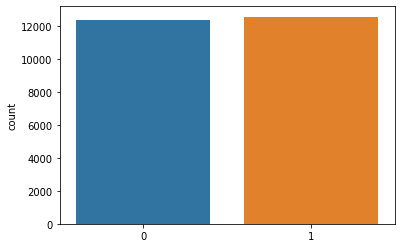

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
sns.countplot(train_labels)


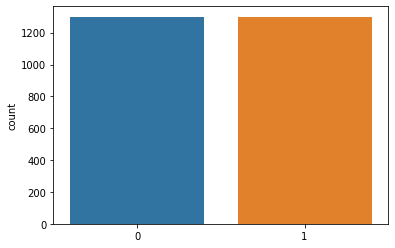

In [ ]:
sns.countplot(test_labels)

### <b>Data Exploration</b>
Let's visualize the images from the train data

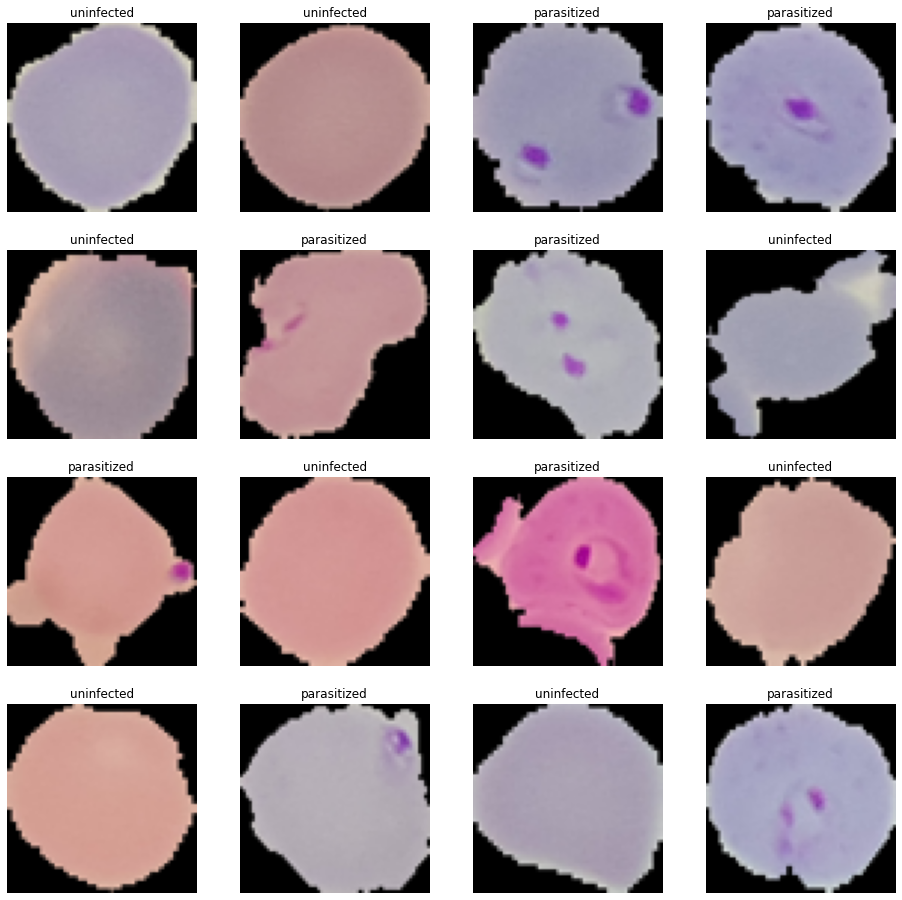

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

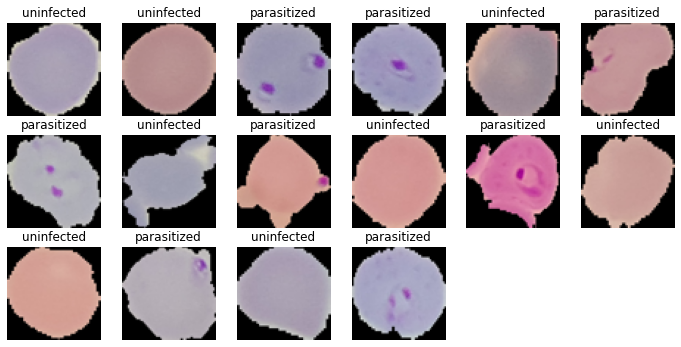

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

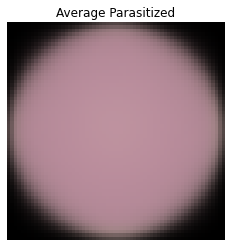

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

uninfected_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

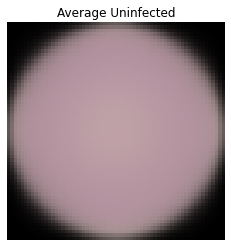

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

parasitized_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean



### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

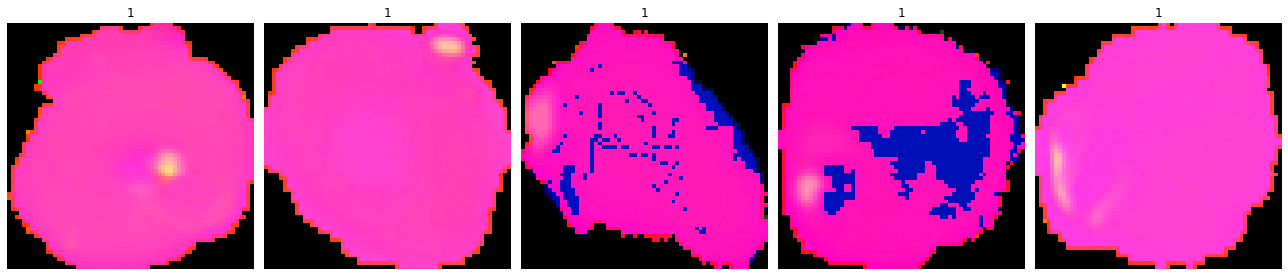

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [ ]:
# Similarly you can visualize for the images in the test data
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

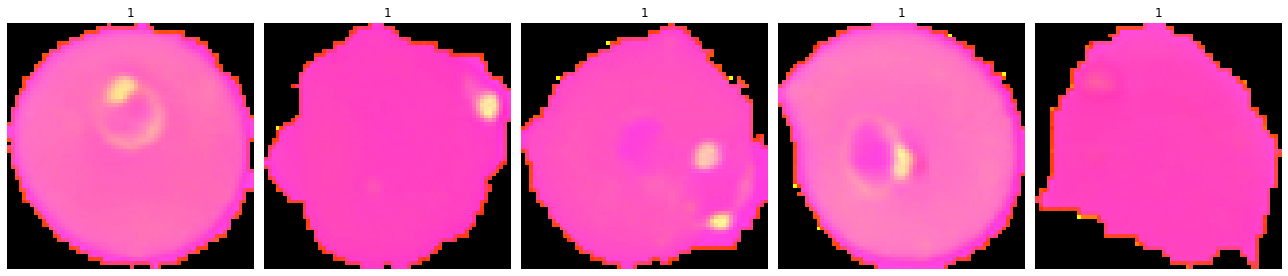

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

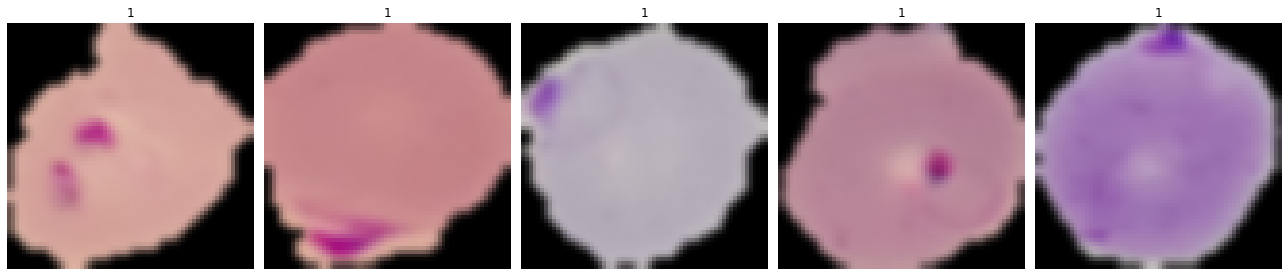

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

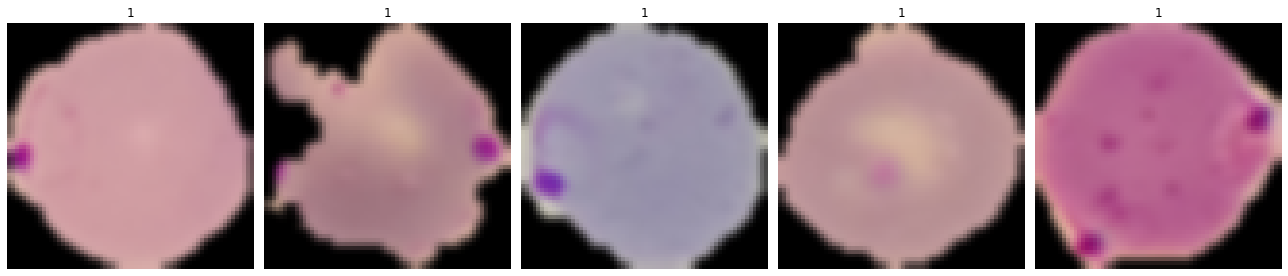

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

## **Proposed approach**

A potential approach we can take to leverage the information available in the 2600+ red blood cell images is to use Convolutional Neural Networks (CNN). The deep learning techniques, CNN, 1) take in an input image, 2) assign importance by using learnable weights and biases to a different image aspect, and 3) differentiate one aspect from the other. Therefore, CNN can be successfully applied in the feature extraction process and convert them into lower dimensions without losing characteristics. These capabilities can be obtained through TensorFlow and Keras. TensorFlow is free and open-source platform developed by Google that helps training large-scale machine learning models. Keras is an open-source software library that provides a Python interface for artificial neural networks.<br>

CNN models include six essential layers. They are:
1. Input layer- contains image data represented by a three-dimensional matrix.
2. Convo layer- feature extractor layer.
3. Pooling layer- used between two convolution layers to reduce the spatial volume of the input image.
4. Fully connected layer- contains multiple layers of neurons that perform the weights and biases assessment and classification.
5. SoftMax/logistic layer- the last layer which produces the binary or multi classification.
6. Output layer- contains the labels <br>

By implementing the six layers in the model structure, the CNN-based deep learning model should be capable of classifying uninfected and parasitized blood cells. Therefore, facilitate disease identification. However, different models might have multiple convo and pooling layers before the fully connected layer with a different number of parameters. Moreover, methods can be added to the model to avoid overfitting the data, such as simplifying the model, dropouts, and early stopping. For this reason, measures should be in place to test the performance of a model after fitting the data.
To evaluate the model performance, we measure the accuracy and the loss of both the training and the testing datasets. To reach the optimal model, we build and train multiple models with different parameters and epochs (a hyperparameter that defines the number of times a learning algorithm works through the training dataset). Lastly, we choose the model with the best accuracy, least loss, least likely to be overfitted, and most effective timewise.

# <b>Model Exploration

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.utils import to_categorical

from keras.layers import LeakyReLU

from tensorflow.keras import optimizers

from tensorflow.keras.layers import BatchNormalization

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# Running the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# Running  the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# Normalizing the train and test images 
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.5).astype('float32')

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Encoding test labels
test_labels = to_categorical(test_labels, 2)

###<B>Creating functions for plotting

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

In [ ]:
# Function to plot train and validation loss
def plot_loss(history):

    N = len(history.history["loss"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["loss"], label = "train_loss", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_loss"], label = "val_loss", ls = '--')

    plt.title("Loss vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Loss")
    
    plt.legend(loc="upper left")

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

## <b>Base Model

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 13s 7ms/step - loss: 0.4038 - accuracy: 0.8028 - val_loss: 0.1142 - val_accuracy: 0.9527
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1157 - accuracy: 0.9590 - val_loss: 0.0644 - val_accuracy: 0.9904
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0959 - accuracy: 0.9680 - val_loss: 0.0472 - val_accuracy: 0.9920
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0818 - accuracy: 0.9728 - val_loss: 0.0538 - val_accuracy: 0.9898
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0758 - accuracy: 0.9746 - val_loss: 0.0498 - val_accuracy: 0.9892


<b>Plotting the train and validation curves

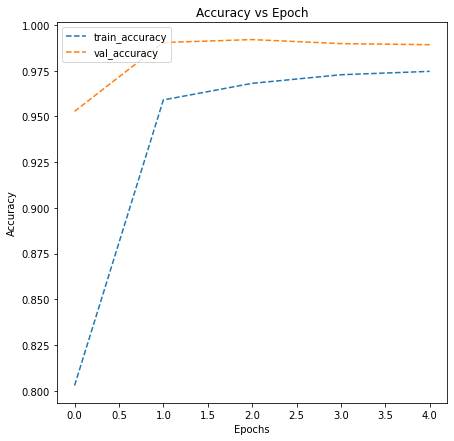

In [ ]:
plot_accuracy(history)

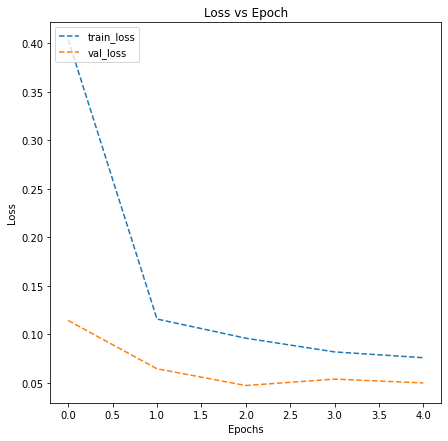

In [ ]:
plot_loss(history)

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 5ms/step - loss: 0.0696 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



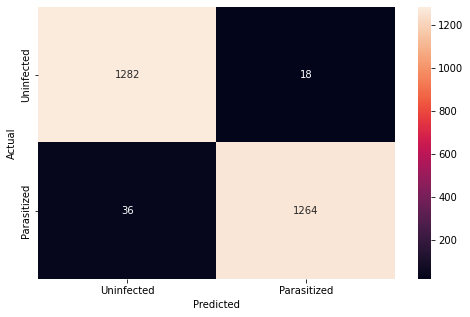

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

## <b>Model 1

Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same" , activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.2))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
#history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 15, verbose = 1)


Epoch 1/15
624/624 [==============================] - 6s 8ms/step - loss: 0.2925 - accuracy: 0.8532 - val_loss: 0.1115 - val_accuracy: 0.9730
Epoch 2/15
624/624 [==============================] - 4s 7ms/step - loss: 0.0820 - accuracy: 0.9733 - val_loss: 0.0368 - val_accuracy: 0.9882
Epoch 3/15
624/624 [==============================] - 5s 7ms/step - loss: 0.0693 - accuracy: 0.9766 - val_loss: 0.0625 - val_accuracy: 0.9740
Epoch 4/15
624/624 [==============================] - 4s 7ms/step - loss: 0.0658 - accuracy: 0.9773 - val_loss: 0.0771 - val_accuracy: 0.9661


<b> Plotting the train and the validation curves

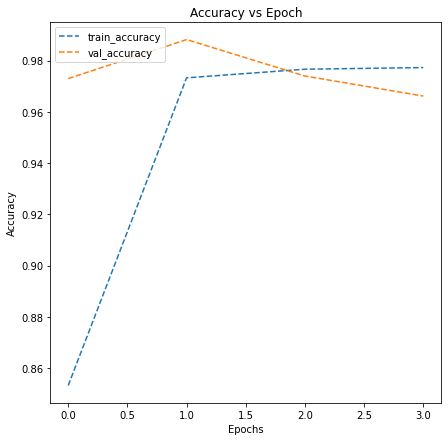

In [ ]:
plot_accuracy(history1)

###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])


82/82 [==============================] - 1s 5ms/step - loss: 0.0474 - accuracy: 0.9854

 Test_Accuracy:- 0.9853846430778503


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1300
           1       0.97      1.00      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



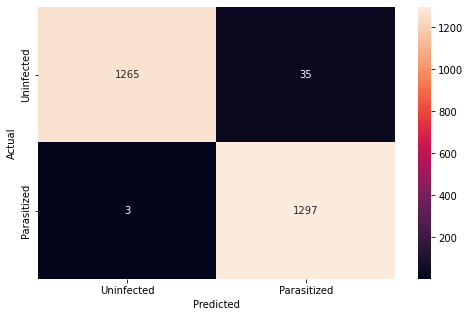

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights:
The first model had 84,002 total trainable parameters. Model (1) has five convolutional layers and the same fully connected layer compared to the base model, except that we changed the dropout rate from 0.4 to 0.2 before the output layer. Moreover, the convolutional layers have an alternating ReLU activation function, dropping out 20% of the neurons three times before the fully connected layer. 
Compared to the base model, in this model we decreased the dropout rate from 40% to 20% in the fully connected layer before the output classification layer. The reason is that we wanted to improve training accuracy and loss. Therefore, we see in the accuracy/epoch chart (Figure 2-a) an increase in the testing accuracy compared to the validation accuracy. The model used 4 epochs to be trained. Looking at Figure (2-b), we notice an increase in the F1 scores. The increase in the parasitized F-1 score is linked to improving recall, which is clinically meaningful. We want our model to do better in diagnosing patients with Malaria so they can start treatment sooner. And from the confusion matrix, we see a decrease in misclassified parasitized cells (3). On the other hand, the number of incorrectly misclassified uninfected cells increased to (35) Lastly, the accuracy also improved to 99%. 



## <b>Model 2

Trying to improve the model using Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same" ))

model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512, activation = "relu"))

model2.add(Dropout(0.2))

model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:

history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.0300 - accuracy: 0.9889 - val_loss: 0.0625 - val_accuracy: 0.9848
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0301 - accuracy: 0.9887 - val_loss: 0.0504 - val_accuracy: 0.9866
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0308 - accuracy: 0.9887 - val_loss: 0.0691 - val_accuracy: 0.9830
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0292 - accuracy: 0.9884 - val_loss: 0.0789 - val_accuracy: 0.9810


<b>Plotting the train and validation accuracy

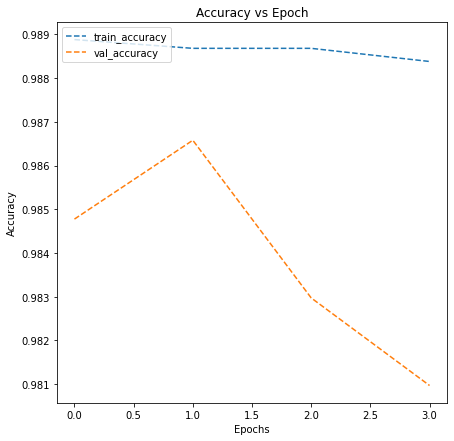

In [ ]:
plot_accuracy(history2)

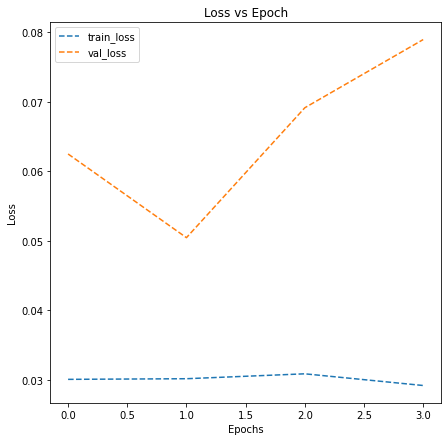

In [ ]:
plot_loss(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9815

 Test_Accuracy:- 0.9815384745597839


<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



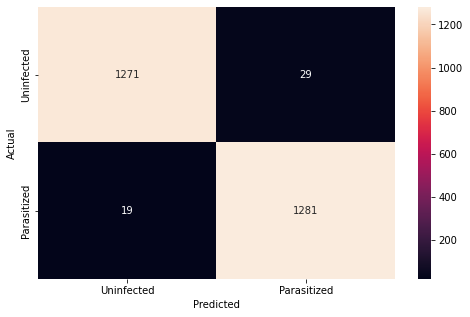

In [ ]:
# Plotting the accuracies
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


####<b>Observations and insights:
The second model has 84,610 total trainable parameters. It has the same structure as the previous model, except that we removed the ReLU activation function and added a LeakyReLU after each convolutional layer. Moreover, we replaced the Dropout function before the fully connected layer with Bach-Normalization and kept the dropout rate before the output layer at 20%. 
We used The callback function to avoid overfitting the model, and we split 20% of the data for validation. As a result, figure (3-a) shows a more stable trend for both the training and validation accuracy. On the 4th and final epoch, our training dataset's accuracy and loss were 0.988 and 0.03, respectively. And the accuracy and loss of our validation dataset were 0.981 and 0.08, respectively. 
Testing the model resulted in a 0.98 F1 score for the parasitized and uninfected cells and a 0.98 model accuracy. We see a slight increase in the incorrectly identified parasitized cells (19) and a decrease in the incorrectly identified uninfected cells (29). All in all, the progress looks promising.

 


## <b>Model 3

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

Trying to improve the model even further, we decided to use the image data generator provided by the TensorFlow.Keras.preprocessing.image library to perform the following on the training images only (no changes shall be performed on the testing dataset):
1. Horizontal Flip      
2. Vertical Flip     
3. Height Shift    
4. Width Shift     
5. Rotation
6. Shear     
7. Zoom 

This process is called data augmentation and is used to increase the differences in the training data; therefore, improved the model prediction accuracy. Moreover, it prevents data scarcity and reduced chances of overfitting. 


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  vertical_flip = False, 
                                  height_shift_range= 0.1, 
                                  width_shift_range=0.1, 
                                  rotation_range=20, 
                                  shear_range = 0.1,
                                  zoom_range=0.1)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

####<B>Visualizing Augmented images

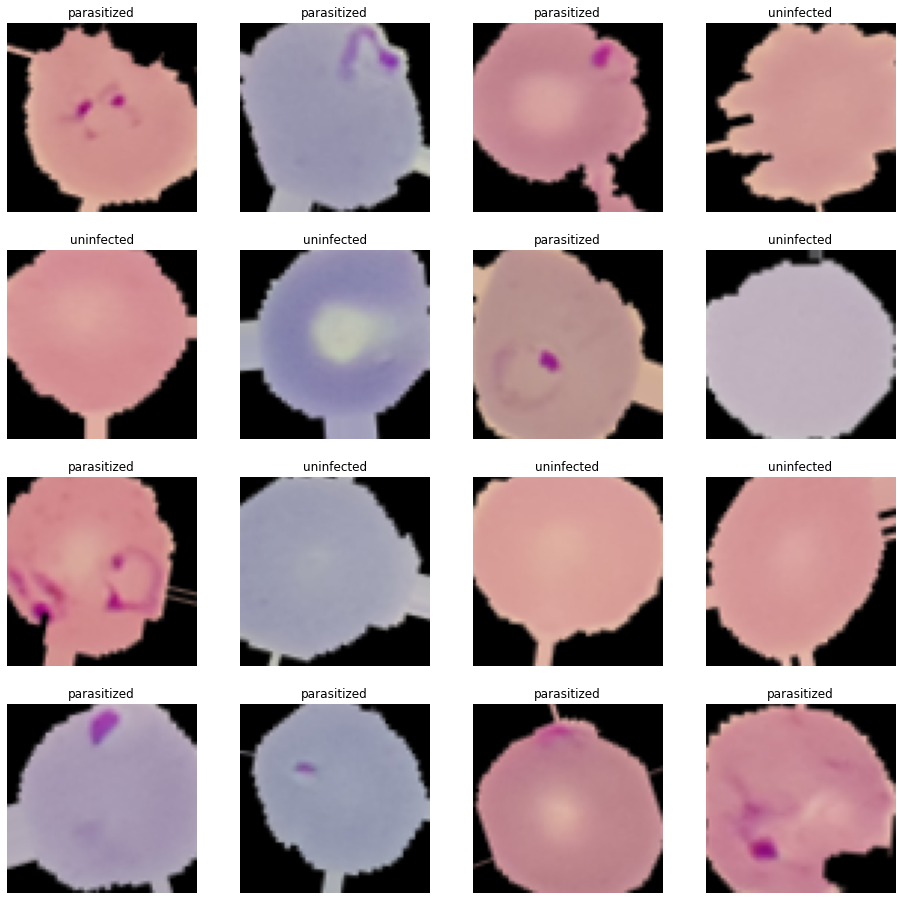

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: we see changes in the cells. These changes are the process that we performed on the images, such as horizontal and vertical flip, height and width shift, rotation, sheering, and zooming

###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model3.add(LeakyReLU(alpha=0.1))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model3.add(LeakyReLU(alpha=0.1))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same" ))

model3.add(LeakyReLU(alpha=0.1))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model3.add(LeakyReLU(alpha=0.1))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model3.add(LeakyReLU(alpha=0.1))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.2))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model3.summary()

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss ='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, callbacks = callbacks, 
                                  validation_data = val_generator,
                                  batch_size = 32,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 26s 79ms/step - loss: 0.4938 - accuracy: 0.7319 - val_loss: 0.1445 - val_accuracy: 0.9635
Epoch 2/20
312/312 [==============================] - 23s 74ms/step - loss: 0.1253 - accuracy: 0.9556 - val_loss: 0.0819 - val_accuracy: 0.9732
Epoch 3/20
312/312 [==============================] - 23s 74ms/step - loss: 0.1040 - accuracy: 0.9664 - val_loss: 0.0742 - val_accuracy: 0.9754
Epoch 4/20
312/312 [==============================] - 23s 74ms/step - loss: 0.0997 - accuracy: 0.9674 - val_loss: 0.0730 - val_accuracy: 0.9766
Epoch 5/20
312/312 [==============================] - 23s 75ms/step - loss: 0.0919 - accuracy: 0.9707 - val_loss: 0.0799 - val_accuracy: 0.9694
Epoch 6/20
312/312 [==============================] - 27s 88ms/step - loss: 0.0877 - accuracy: 0.9716 - val_loss: 0.0715 - val_accuracy: 0.9758
Epoch 7/20
312/312 [==============================] - 23s 74ms/step - loss: 0.0861 - accuracy: 0.9720 - val_loss: 0.0724 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

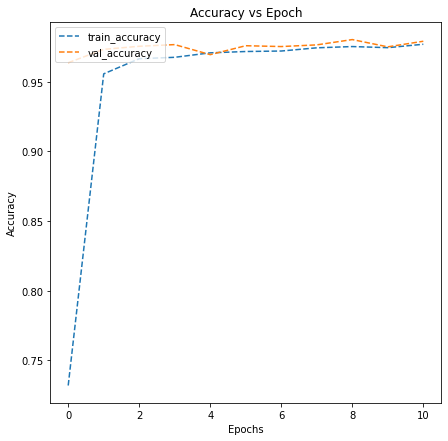

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])


82/82 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9835

 Test_Accuracy:- 0.9834615588188171


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



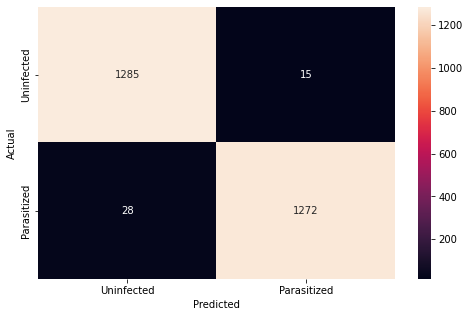

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights:
We trained model (2) that we developed earlier using the newly generated training images. The model took 11 epochs to be trained, with a batch-size of 32. The training accuracy and loss were 0.98 and 0.074 on the 11th epoch. And the validation accuracy and loss were 0.98 and 0.063, respectively. Moreover, the F1 scores and the model’s accuracy were 0.98. Lastly, the incorrectly classified parasitized and uninfected cells were 28 and 15, respectively.
 


## <b>Model 4

### **Pre-trained model (VGG16)**

In our final attempt to improve the model, we used the VGG16 pre-trained model developed by the Department of Science and Engineering of Oxford University. We used the VGG16 model to replace the convolutional layer in the new model and changed its settings to non-learnable as it is already trained. Then on top of the model, we added a classification layer. Then we created the fully connected layer by adding a flattening function, three dense layers with ReLU functions (256, 128, and 64 neurons, respectively), a dropout function with a 30% rate, a Batch-Normalization function, and an output layer with two neurons and SoftMax function. We used a call-back function, an iteration of 0.001 and 0.00001 learning rate, and a 32, 65, and 100 batch size to fit the model. 

**The model below will use a learning rate of 0.001 and a batch size of 32**

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

x = Conv2D(filters = 32, kernel_size = 2, padding = "same" , activation = "relu")(transfer_layer.output)

x = Flatten()(x)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x= Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model


###<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate = 0.001)
model4.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history4 = model4.fit(train_generator, callbacks = callbacks, 
                      validation_data= val_generator,
                      epochs = 20,
                      batch_size = 32,
                      validation_split = 0.2,
                      verbose = 1)

Epoch 1/20
312/312 [==============================] - 38s 91ms/step - loss: 0.2699 - accuracy: 0.8893 - val_loss: 0.3750 - val_accuracy: 0.8305
Epoch 2/20
312/312 [==============================] - 27s 86ms/step - loss: 0.2086 - accuracy: 0.9190 - val_loss: 0.2696 - val_accuracy: 0.8830
Epoch 3/20
312/312 [==============================] - 27s 86ms/step - loss: 0.1936 - accuracy: 0.9272 - val_loss: 0.2020 - val_accuracy: 0.9161
Epoch 4/20
312/312 [==============================] - 27s 86ms/step - loss: 0.1864 - accuracy: 0.9295 - val_loss: 0.1799 - val_accuracy: 0.9405
Epoch 5/20
312/312 [==============================] - 26s 84ms/step - loss: 0.1823 - accuracy: 0.9301 - val_loss: 0.2284 - val_accuracy: 0.9123
Epoch 6/20
312/312 [==============================] - 28s 89ms/step - loss: 0.1760 - accuracy: 0.9346 - val_loss: 0.1834 - val_accuracy: 0.9281


<b>Plot the train and validation accuracy

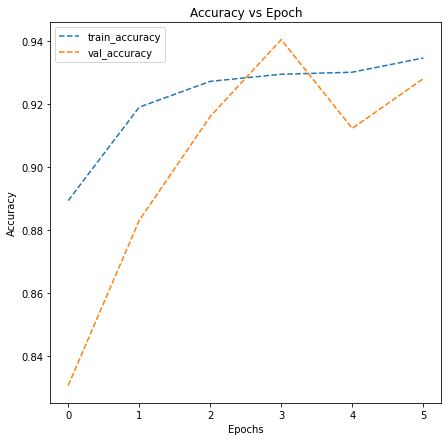

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

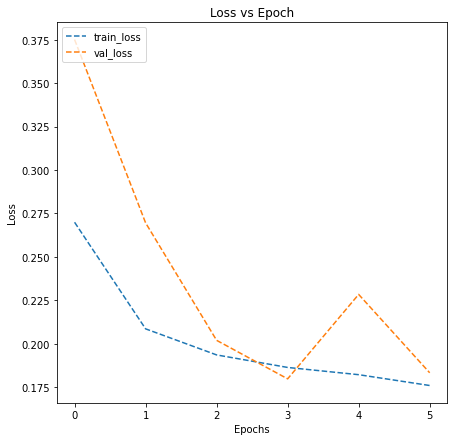

In [ ]:
plot_loss(history4)

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 2s 23ms/step - loss: 0.2491 - accuracy: 0.8992

 Test_Accuracy:- 0.8992307782173157


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1300
           1       0.84      0.98      0.91      1300

    accuracy                           0.90      2600
   macro avg       0.91      0.90      0.90      2600
weighted avg       0.91      0.90      0.90      2600



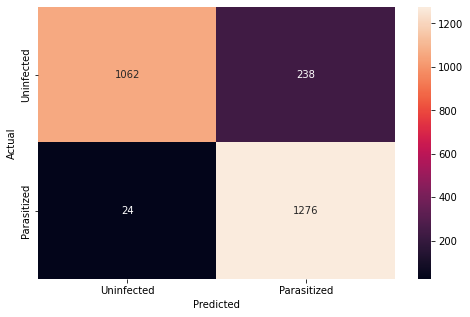

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights:
The VGG16 model perfomred worse than what we have accomplished so far. Using 0.001 learning rate and 32 batch size yielded a 0.89 F1 score for the uninfected cells and 0.91 F1 score for the parasitized cells. The overall accuracy was 90%. Knowing that the model took 173 seconds and 6 epochs to be trained. 
 


## <b>Model 5

We will continue using the VGG16 to replace our convolutional layer. However, we will set the learning rate to 0.00001 this time.

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

x = Conv2D(filters = 32, kernel_size = 2, padding = "same" , activation = "relu")(transfer_layer.output)

x = Flatten()(x)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x= Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model5 = Model(vgg.input, pred) # Initializing the model


###<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate = 0.00001)
model5.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history5 = model5.fit(train_generator, callbacks = callbacks, 
                      validation_data= val_generator,
                      epochs = 20,
                      batch_size = 32,
                      validation_split = 0.2,
                      verbose = 1)

Epoch 1/20
312/312 [==============================] - 29s 90ms/step - loss: 0.6758 - accuracy: 0.6300 - val_loss: 0.5848 - val_accuracy: 0.7652
Epoch 2/20
312/312 [==============================] - 29s 92ms/step - loss: 0.4928 - accuracy: 0.7804 - val_loss: 0.3898 - val_accuracy: 0.8490
Epoch 3/20
312/312 [==============================] - 27s 88ms/step - loss: 0.4033 - accuracy: 0.8318 - val_loss: 0.3180 - val_accuracy: 0.8664
Epoch 4/20
312/312 [==============================] - 27s 87ms/step - loss: 0.3574 - accuracy: 0.8528 - val_loss: 0.2847 - val_accuracy: 0.8822
Epoch 5/20
312/312 [==============================] - 27s 88ms/step - loss: 0.3247 - accuracy: 0.8713 - val_loss: 0.2601 - val_accuracy: 0.8946
Epoch 6/20
312/312 [==============================] - 27s 87ms/step - loss: 0.3044 - accuracy: 0.8814 - val_loss: 0.2425 - val_accuracy: 0.9042
Epoch 7/20
312/312 [==============================] - 27s 86ms/step - loss: 0.2873 - accuracy: 0.8867 - val_loss: 0.2290 - val_accuracy:

<b>Plot the train and validation accuracy

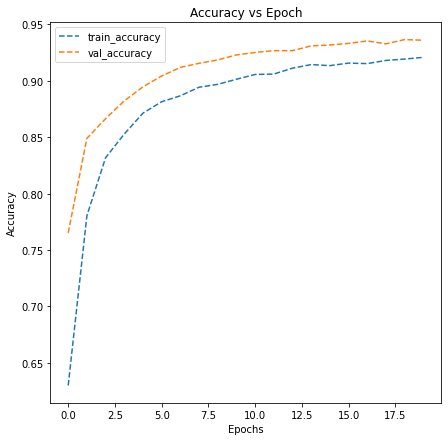

In [ ]:
# plotting the accuracies
plot_accuracy(history5)

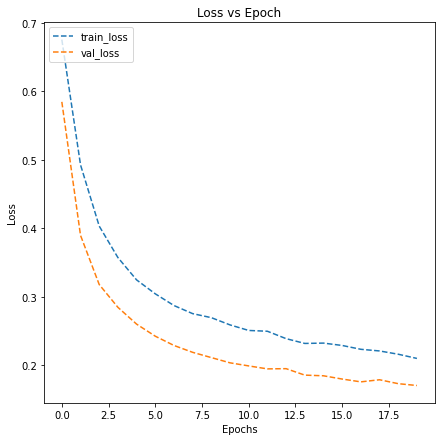

In [ ]:
plot_loss(history5)

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy5 = model5.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy5[1])

82/82 [==============================] - 2s 18ms/step - loss: 0.1913 - accuracy: 0.9242

 Test_Accuracy:- 0.9242307543754578


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1300
           1       0.89      0.96      0.93      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



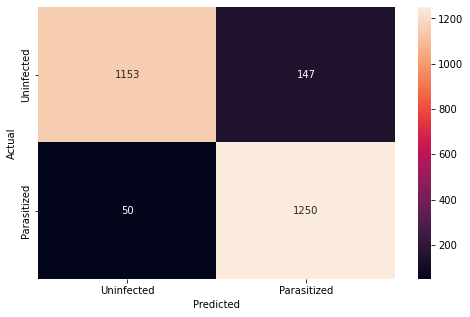

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model5.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights:
This iteration of the VGG16 model performed better than the previous one. Using a 0.00001 learning rate and 32 batch size yielded a 0.92 F1 score for the uninfected cells and 0.93 F1 scores for the parasitized cells. The overall accuracy was 92%. However, the model took 5 mins and 20 epochs to be trained.  
 


## <b>Model 6

We will continue using the VGG16 to replace our convolutional layer. We will keep the learning rate at 0.00001 as the fifth model perfomred better than the forth model. However, we will change the batch size to 65. 

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

x = Conv2D(filters = 32, kernel_size = 2, padding = "same" , activation = "relu")(transfer_layer.output)

x = Flatten()(x)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x= Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model6 = Model(vgg.input, pred) # Initializing the model


###<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate = 0.00001)
model6.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history6 = model6.fit(train_generator, callbacks = callbacks, 
                      validation_data= val_generator,
                      epochs = 20,
                      batch_size = 65,
                      validation_split = 0.2,
                      verbose = 1)

Epoch 1/20
312/312 [==============================] - 31s 97ms/step - loss: 0.6935 - accuracy: 0.6235 - val_loss: 0.5667 - val_accuracy: 0.7959
Epoch 2/20
312/312 [==============================] - 30s 95ms/step - loss: 0.5067 - accuracy: 0.7849 - val_loss: 0.3713 - val_accuracy: 0.8476
Epoch 3/20
312/312 [==============================] - 30s 97ms/step - loss: 0.4029 - accuracy: 0.8370 - val_loss: 0.3051 - val_accuracy: 0.8676
Epoch 4/20
312/312 [==============================] - 37s 117ms/step - loss: 0.3491 - accuracy: 0.8617 - val_loss: 0.2844 - val_accuracy: 0.8744
Epoch 5/20
312/312 [==============================] - 32s 103ms/step - loss: 0.3261 - accuracy: 0.8710 - val_loss: 0.2550 - val_accuracy: 0.8942
Epoch 6/20
312/312 [==============================] - 31s 99ms/step - loss: 0.3006 - accuracy: 0.8842 - val_loss: 0.2456 - val_accuracy: 0.9000
Epoch 7/20
312/312 [==============================] - 33s 105ms/step - loss: 0.2878 - accuracy: 0.8880 - val_loss: 0.2324 - val_accura

<b>Plot the train and validation accuracy

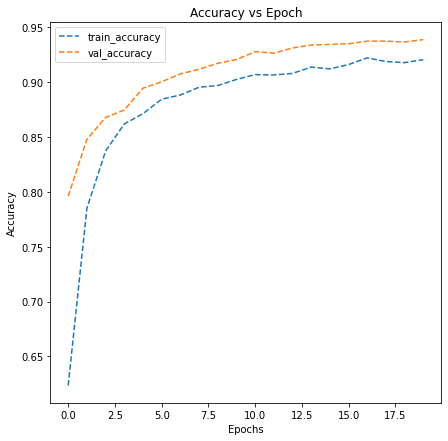

In [ ]:
# plotting the accuracies
plot_accuracy(history6)

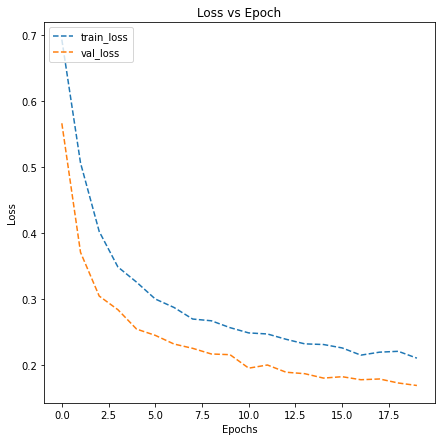

In [ ]:
plot_loss(history6)

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy6 = model6.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy6[1])

82/82 [==============================] - 2s 18ms/step - loss: 0.1762 - accuracy: 0.9273

 Test_Accuracy:- 0.927307665348053


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1300
           1       0.91      0.95      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



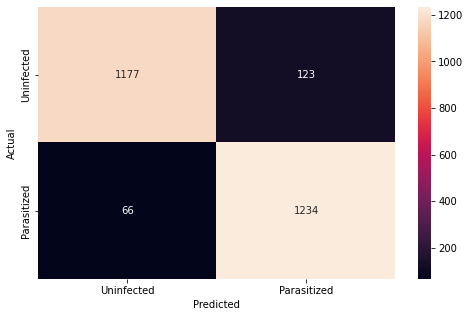

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model6.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights:
This iteration of the VGG16 model performed slightly better than the previous one. Using a 0.00001 learning rate and 65 batch size yielded a 0.93 F1 score for both uninfected parasitized cells. The overall accuracy was 93%. However, the model took 10 mins and 20 epochs to be trained.
 


## <b>Model 7

We will continue using the VGG16 to replace our convolutional layer. We will keep the learning rate at 0.00001 as the fifth model perfomred better than the forth model. However, we will change the batch size to 100. 

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

x = Conv2D(filters = 32, kernel_size = 2, padding = "same" , activation = "relu")(transfer_layer.output)

x = Flatten()(x)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x= Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model7 = Model(vgg.input, pred) # Initializing the model


###<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate = 0.00001)
model7.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history7 = model7.fit(train_generator, callbacks = callbacks, 
                      validation_data= val_generator,
                      epochs = 30,
                      batch_size = 100,
                      validation_split = 0.2,
                      verbose = 1)

Epoch 1/30
312/312 [==============================] - 27s 87ms/step - loss: 0.2103 - accuracy: 0.9229 - val_loss: 0.1668 - val_accuracy: 0.9389
Epoch 2/30
312/312 [==============================] - 27s 88ms/step - loss: 0.2121 - accuracy: 0.9210 - val_loss: 0.1647 - val_accuracy: 0.9383
Epoch 3/30
312/312 [==============================] - 29s 92ms/step - loss: 0.2057 - accuracy: 0.9232 - val_loss: 0.1626 - val_accuracy: 0.9379
Epoch 4/30
312/312 [==============================] - 27s 88ms/step - loss: 0.2039 - accuracy: 0.9271 - val_loss: 0.1600 - val_accuracy: 0.9387
Epoch 5/30
312/312 [==============================] - 27s 88ms/step - loss: 0.2034 - accuracy: 0.9243 - val_loss: 0.1592 - val_accuracy: 0.9407
Epoch 6/30
312/312 [==============================] - 27s 87ms/step - loss: 0.2020 - accuracy: 0.9267 - val_loss: 0.1569 - val_accuracy: 0.9401
Epoch 7/30
312/312 [==============================] - 27s 88ms/step - loss: 0.1963 - accuracy: 0.9285 - val_loss: 0.1613 - val_accuracy:

<b>Plot the train and validation accuracy

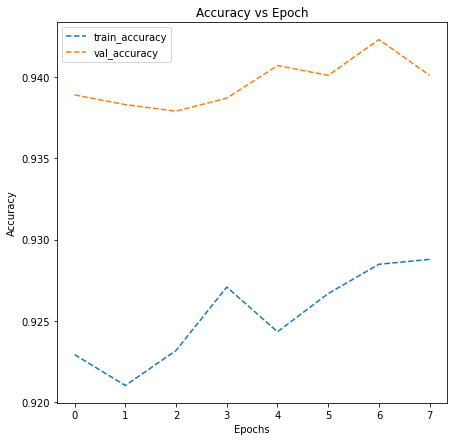

In [ ]:
# plotting the accuracies
plot_accuracy(history7)

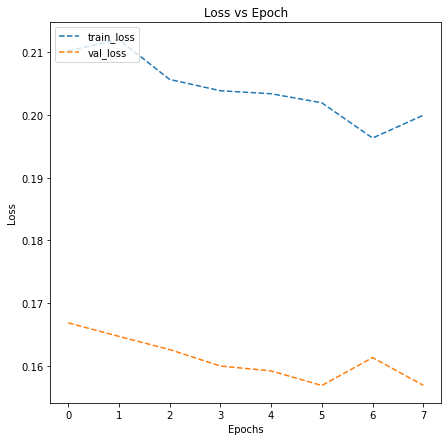

In [ ]:
plot_loss(history7)

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy7 = model7.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy7[1])

82/82 [==============================] - 2s 18ms/step - loss: 0.1852 - accuracy: 0.9223

 Test_Accuracy:- 0.9223076701164246


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1300
           1       0.89      0.96      0.93      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



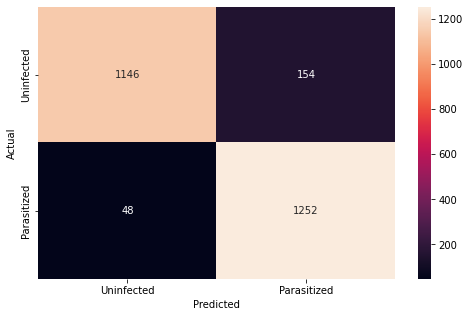

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model7.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights:
This iteration of the VGG16 model performed worse than the previous one. Using a 0.00001 learning rate and 100 batch size yielded a 0.92 F1 score for the uninfected cells and a 0.93 F1 score for the parasitized cells. The overall accuracy was 92%. The model took 3 mins and 8 epochs to be trained.
 


# <b>Recommendations 

For model future improvements, we suggest trying the following:
1.	Try different learning rates and batch-size when fitting the second model using the data image generator. 
2.	Use the Ensemble technique with multiple weak models to improve the results.<br>

For policymakers, we suggest adopting the first model to automate and facilitate Malaria detection. However, we strongly recommend reviewing the images classified as uninfected by a physician before making the final clinical decision. This is because we do not wish for a patient to go untreated or receive delayed treatment because of a misclassification error.  


In [ ]:
!jupyter nbconvert --to html Final_Submission.ipynb